In [ ]:
# In this project, we aim to build a complete machine learning pipeline to analyze and predict customer churn for Netflix.
# The goal is to identify which users are most likely to cancel their subscriptions based on their viewing behavior, 
# engagement patterns, and demographic attributes. We begin by exploring and cleaning the dataset to ensure data quality,
# followed by data transformation and feature engineering to enhance the predictive power of our variables. Then, we 
# train and compare several models  such as  Logistic Regression, SVM, Random Forest, and XGBoost using cross-validation
# and hyperparameter tuning to find the most accurate and reliable one. Finally, we interpret the results using feature 
# importance and SHAP analysis, drawing actionable insights to help Netflix improve user retention through behavior-based 
# strategies.

In [1]:
import pandas as pd 
import numpy as np 
df=pd.read_csv('netflix.csv')
df

customer_id  age  gender subscription_type  \
0     a9b75100-82a8-427a-a208-72f24052884a   51   Other             Basic   
1     49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b   47   Other          Standard   
2     4d71f6ce-fca9-4ff7-8afa-197ac24de14b   27  Female          Standard   
3     d3c72c38-631b-4f9e-8a0e-de103cad1a7d   53   Other           Premium   
4     4e265c34-103a-4dbb-9553-76c9aa47e946   56   Other          Standard   
...                                    ...  ...     ...               ...   
4995  44f3ba44-b95d-4e50-a786-bac4d06f4a43   19  Female             Basic   
4996  18779bcb-ba2b-41da-b751-e70b812061ec   67  Female             Basic   
4997  3f32e8c5-615b-4a3b-a864-db2688f7834f   66    Male          Standard   
4998  7b0ad82d-6571-430e-90f4-906259e0e89c   59  Female             Basic   
4999  82aeef39-ddb0-40ad-bae1-5c436e0cf042   57    Male             Basic   

      watch_hours  last_login_days         region   device  monthly_fee  \
0           14.73               29         Africa       TV         8.99   
1            0.70               19         Europe   Mobile        13.99   
2           16.32               10           Asia       TV        13.99   
3            4.51               12        Oceania       TV        17.99   
4            1.89               13         Africa   Mobile        13.99   
...           ...              ...            ...      ...          ...   
4995        49.17               11         Europe  Desktop         8.99   
4996         9.24                2  North America  Desktop         8.99   
4997        16.55               49  South America  Desktop        13.99   
4998         9.12                3         Europe   Laptop         8.99   
4999         1.62               17         Africa   Mobile         8.99   

      churned payment_method  number_of_profiles  avg_watch_time_per_day  \
0           1      Gift Card                   1                    0.49   
1           1      Gift Card                   5                    0.03   
2           0         Crypto                   2                    1.48   
3           1         Crypto                   2                    0.35   
4           1         Crypto                   2                    0.13   
...       ...            ...                 ...                     ...   
4995        0    Credit Card                   4                    4.10   
4996        0         PayPal                   3                    3.08   
4997        1     Debit Card                   2                    0.33   
4998        0    Credit Card                   4                    2.28   
4999        1         Crypto                   2                    0.09   

     favorite_genre  
0            Action  
1            Sci-Fi  
2             Drama  
3            Horror  
4            Action  
...             ...  
4995          Drama  
4996    Documentary  
4997         Action  
4998         Sci-Fi  
4999         Action  

[5000 rows x 14 columns]

In [ ]:
# features or columns :

# 1-customer_id:Unique identifier for each customer.
# 2-age: Customer’s age in years.
# 3-gender:Gender of the customer. May include “Male,” “Female,” “Other.”
# 4-subscription_type:Plan type subscribed to: Basic, Standard, or Premium.
# 5-watch_hours:Total hours of content watched in the last month. Indicates engagement.
# 6-last_login_days:Days since last login — higher values mean less recent activity.
# 7-region:Customer’s geographical region.
# 8-device:Primary device used for streaming.
# 9-monthly_fee:Subscription cost (USD) per month based on plan.
# 10-churned:Target variable: 1 = churned, 0 = retained.
# 11-payment_method:Payment type used by customer.
# 12-number_of_profiles:Number of user profiles under the same account.
# 13-avg_watch_time_per_day:Average hours of content watched per day.
# 14-favorite_genre: Genre most frequently watched by the customer.
    
    
# Grouping the columns into broader features:
    
# Predictive Target: churned
# Engagement metrics: watch_hours, avg_watch_time_per_day, last_login_days
# Demographic metrics: age, gender, region
# Plan-related metrics: subscription_type, monthly_fee, number_of_profiles
# Behavioral / preference metrics: favorite_genre, device, payment_method

In [3]:
df.describe()

age  watch_hours  last_login_days  monthly_fee      churned  \
count  5000.000000  5000.000000      5000.000000  5000.000000  5000.000000   
mean     43.847400    11.649450        30.089800    13.683400     0.503000   
std      15.501128    12.014654        17.536078     3.692062     0.500041   
min      18.000000     0.010000         0.000000     8.990000     0.000000   
25%      30.000000     3.337500        15.000000     8.990000     0.000000   
50%      44.000000     8.000000        30.000000    13.990000     1.000000   
75%      58.000000    16.030000        45.000000    17.990000     1.000000   
max      70.000000   110.400000        60.000000    17.990000     1.000000   

       number_of_profiles  avg_watch_time_per_day  
count         5000.000000             5000.000000  
mean             3.024400                0.874800  
std              1.415841                2.619824  
min              1.000000                0.000000  
25%              2.000000                0.110000  
50%              3.000000                0.290000  
75%              4.000000                0.720000  
max              5.000000               98.420000

In [4]:
df.dtypes

customer_id                object
age                         int64
gender                     object
subscription_type          object
watch_hours               float64
last_login_days             int64
region                     object
device                     object
monthly_fee               float64
churned                     int64
payment_method             object
number_of_profiles          int64
avg_watch_time_per_day    float64
favorite_genre             object
dtype: object

In [5]:
numeric_df = df.select_dtypes(include=['number'])
median_values = numeric_df.median()

median_values

age                       44.00
watch_hours                8.00
last_login_days           30.00
monthly_fee               13.99
churned                    1.00
number_of_profiles         3.00
avg_watch_time_per_day     0.29
dtype: float64

In [ ]:
## so we can say most of our columns except avg_watch_time_per_day are symmetircal which means they have few outliers.

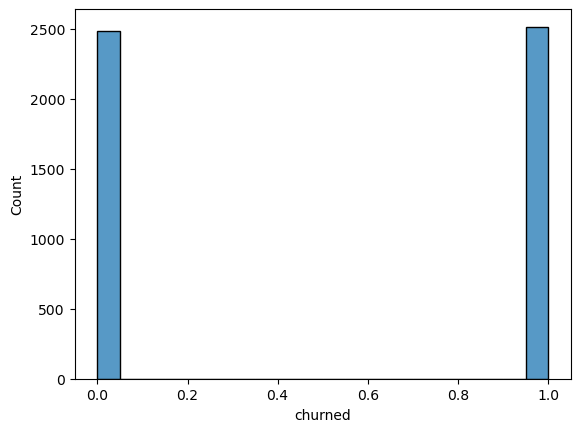

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["churned"], bins=20, kde=False)
plt.show()

In [3]:
import matplotlib.pyplot as plt 

In [ ]:
# The graph showing that the number of the obseravtion in churn is the same, so we do not need to do some imbalance test
# like SMOTE or undersampling), and the model will not be biased toward the majority class and metrics like accuracy,
# precision, and recall will be more reliable.

In [ ]:
***EDA
# Now general visulization for detecting the relation between dep and ind variables and also the outliers in ind features

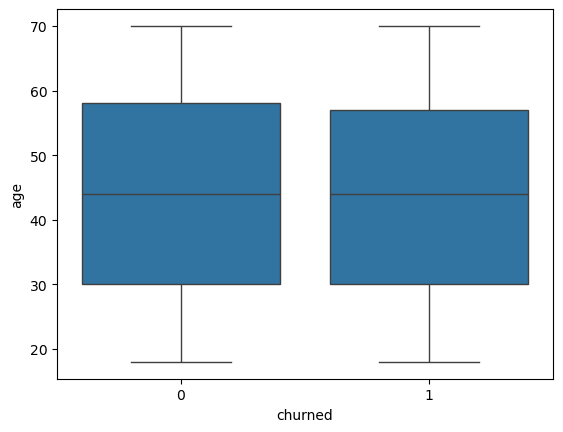

In [7]:
sns.histplot(df["age"], bins=15, kde=False)
plt.show()

sns.boxplot(x="churned", y="age", data=df)
plt.show()

In [ ]:
## there are no outliers in the age column for either churn group (0 = not churned, 1 = churned) and both groups have 
##a similar age spread (roughly 20–70 and no customer’s age is unusually low or high compared to the rest.

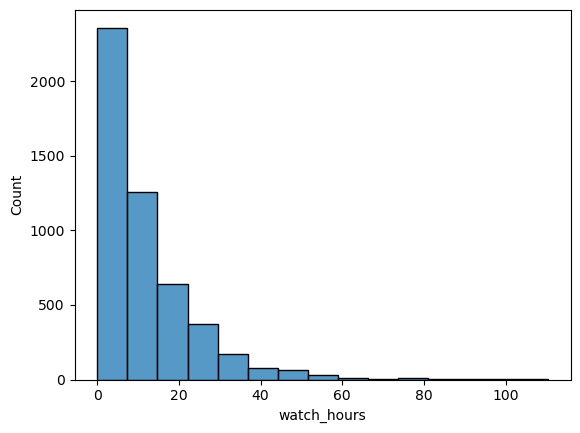

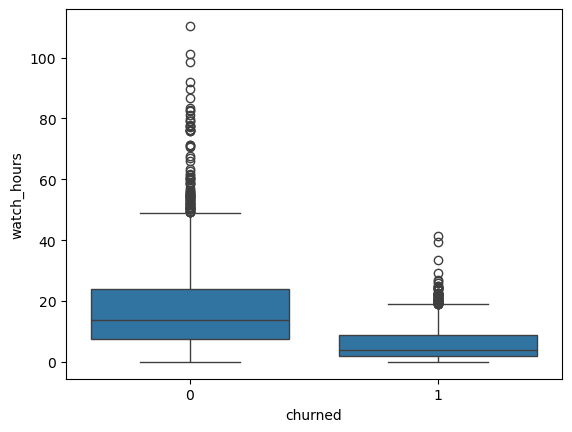

In [8]:
sns.histplot(df["watch_hours"], bins=15, kde=False)
plt.show()

sns.boxplot(x="churned", y="watch_hours", data=df)
plt.show()

In [ ]:
# Non-churned customers (0) show much higher total watch hours, with medians around 15–20 hours and some very high
# outliers (50+ hours).
# Churned customers (1) have lower total watch hours, usually below 10 hours.
# The spread is also narrower for churned users, showing consistent low engagement.

## watch_hours has some outliers for both groups that we need to use transformation techniques like box cox oe log later.

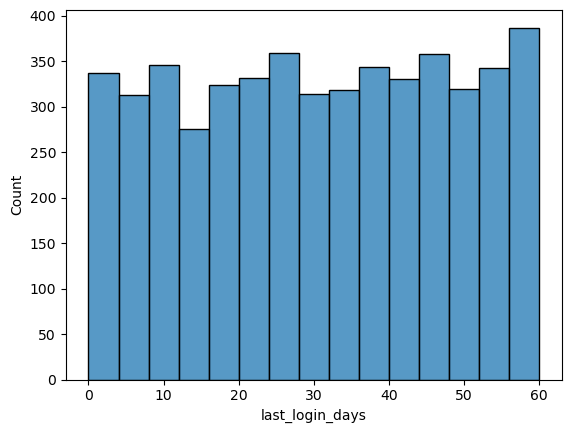

In [9]:
sns.histplot(df["last_login_days"], bins=15, kde=False)
plt.show()

sns.boxplot(x="churned", y="last_login_days", data=df)
plt.show()

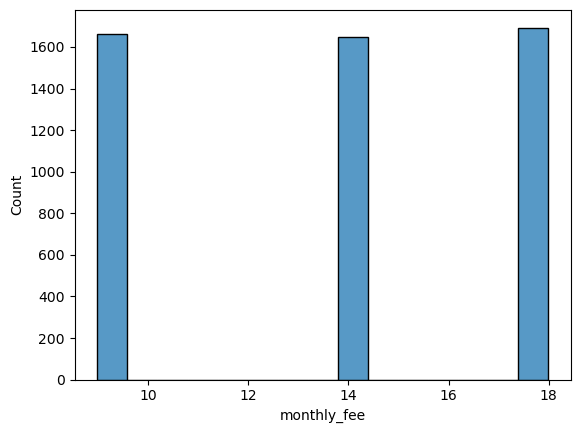

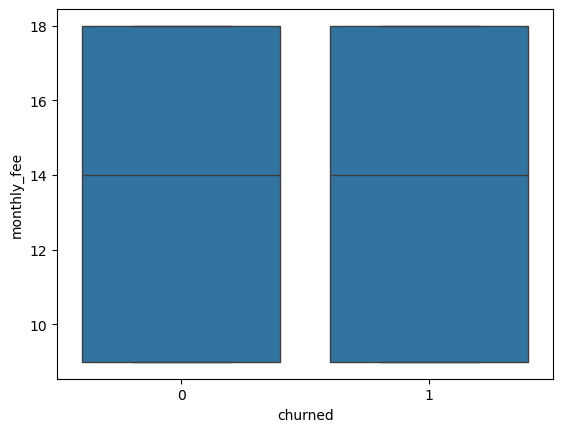

In [10]:
sns.histplot(df["monthly_fee"], bins=15, kde=False)
plt.show()

sns.boxplot(x="churned", y="monthly_fee", data=df)
plt.show()

In [ ]:
# The top gragh shows that monthly_fee takes on only three distinct values around $8.99, $13.99, and $17.99 which 
# correspond to Netflix’s Basic, Standard, and Premium plans.
# and because this columns act like categorical column , they have no outliers. 

In [11]:
sns.histplot(df["number_of_profiles"], bins=15, kde=False)
plt.show()

sns.boxplot(x="churned", y="number_of_profiles", data=df)
plt.show()

In [ ]:
# The number_of_profiles column shows how many individual user profiles are linked to each Netflix account.It ranges from
# 1 to 5 profiles, with all values occurring evenly and no outliers present.

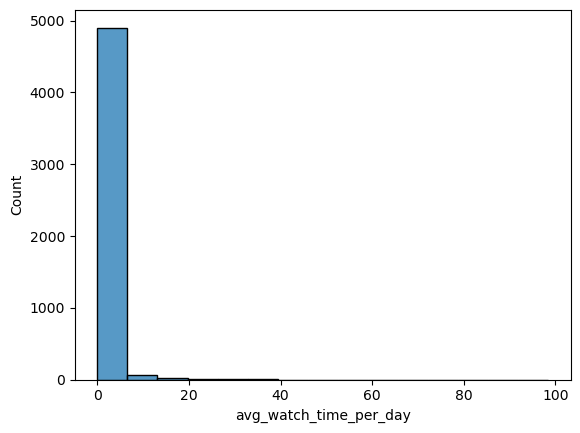

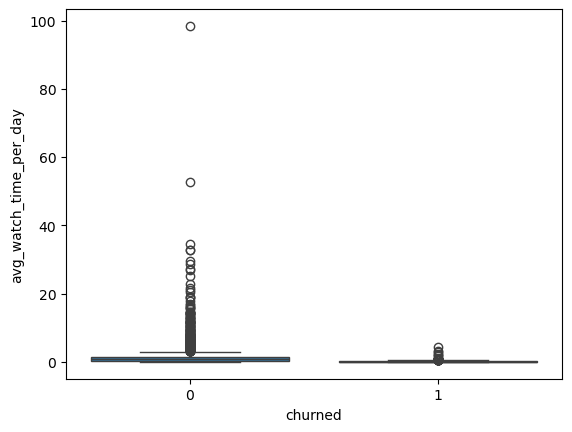

In [12]:
sns.histplot(df["avg_watch_time_per_day"], bins=15, kde=False)
plt.show()

sns.boxplot(x="churned", y="avg_watch_time_per_day", data=df)
plt.show()

In [ ]:
# As it was mentioned before, this column has a lot of outliers and need transformation. 

In [13]:
df['subscription_type'].unique()

array(['Basic', 'Standard', 'Premium'], dtype=object)

In [14]:
df['subscription_type'].value_counts()

subscription_type
Premium     1693
Basic       1661
Standard    1646
Name: count, dtype: int64

In [15]:
sns.countplot(x="subscription_type", hue="churned", data=df)
plt.title("churn by subscription_type")
plt.show()

In [ ]:
# This plot showing Basic-plan users churn much more often, possibly due to limited features or lower perceived value.
# Premium subscribers stay the longest, showing strong satisfaction with quality and flexibility.Thus, higher subscription
# tiers are linked to higher retention.

In [16]:
df['gender'].unique()

array(['Other', 'Female', 'Male'], dtype=object)

In [17]:
df['gender'].value_counts()

gender
Female    1711
Male      1654
Other     1635
Name: count, dtype: int64

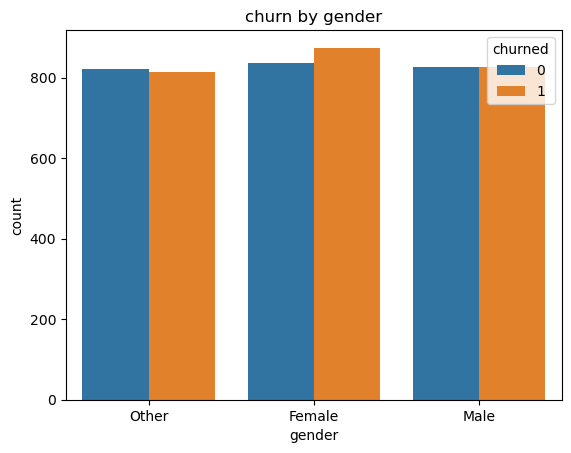

In [18]:
sns.countplot(x="gender", hue="churned", data=df)
plt.title("churn by gender")
plt.show()

In [ ]:
# In this plot Churn is fairly balanced across genders, with females showing a slightly higher rate. This difference is 
# minor and may depend on content type or usage patterns. Overall, gender alone is not a strong predictor of churn.

In [19]:
df['region'].unique()

array(['Africa', 'Europe', 'Asia', 'Oceania', 'South America',
       'North America'], dtype=object)

In [20]:
df['region'].value_counts()

region
South America    873
Europe           867
North America    851
Asia             841
Africa           803
Oceania          765
Name: count, dtype: int64

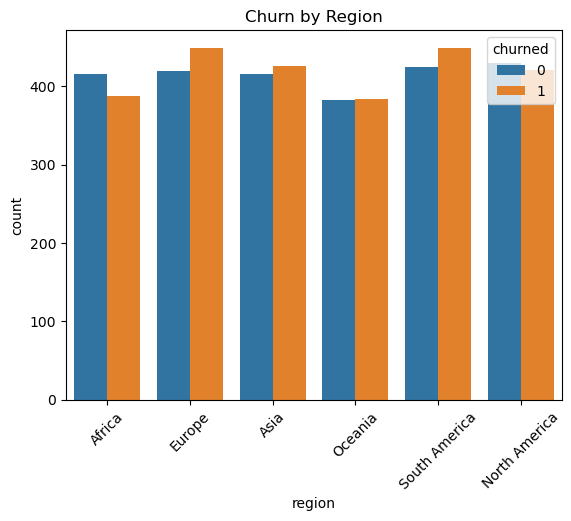

In [21]:
sns.countplot(x="region", hue="churned", data=df)
plt.title("Churn by Region")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Plot showing Europe and South America have higher churn rates, possibly due to regional competition or preferences.
# Africa and North America show stronger customer retention and lower churn.
# This indicates that regional factors influence loyalty and engagement.

In [22]:
df['device'].unique()

array(['TV', 'Mobile', 'Laptop', 'Desktop', 'Tablet'], dtype=object)

In [23]:
df['device'].value_counts()

device
Tablet     1048
Laptop     1006
Mobile     1004
TV          993
Desktop     949
Name: count, dtype: int64

In [24]:
sns.countplot(x="device", hue="churned", data=df)
plt.title("churn by device")
plt.show()

In [ ]:
# Laptop users churn slightly more, possibly indicating casual or mobile viewing habits.TV and Desktop users tend to
# stay longer, showing more committed, home-based engagement. Overall, device type mildly correlates with customer 
# stability.

In [25]:
df['payment_method'].unique()

array(['Gift Card', 'Crypto', 'Debit Card', 'PayPal', 'Credit Card'],
      dtype=object)

In [26]:
df['payment_method'].value_counts()

payment_method
Debit Card     1030
PayPal         1026
Crypto          995
Gift Card       976
Credit Card     973
Name: count, dtype: int64

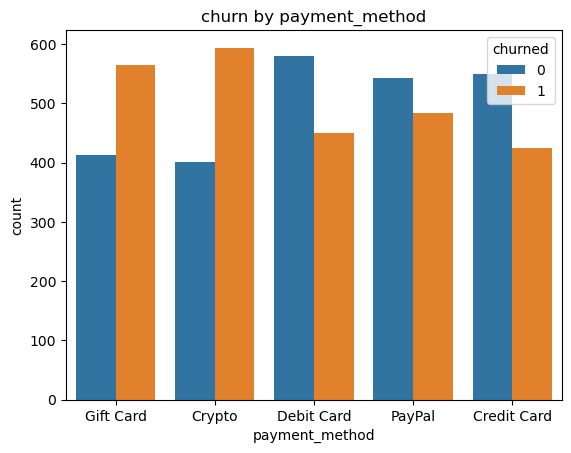

In [27]:
sns.countplot(x="payment_method", hue="churned", data=df)
plt.title("churn by payment_method")
plt.show()

In [ ]:
# Customers paying with Gift Cards or Cryptocurrency show the highest churn, suggesting short-term or privacy-oriented 
# use. Those using Credit or Debit Cards are more stable, likely due to auto-renewal convenience.This shows that payment
# consistency is a strong signal of loyalty.

In [28]:
df['number_of_profiles'].unique()

array([1, 5, 2, 3, 4])

In [29]:
df['number_of_profiles'].value_counts()

number_of_profiles
5    1034
2    1001
4     999
3     994
1     972
Name: count, dtype: int64

In [30]:
sns.countplot(x="number_of_profiles", hue="churned", data=df)
plt.title("churn by number_of_profiles")
plt.show()

In [ ]:
# This shows Accounts with fewer profiles (1–3) have higher churn, indicating lighter or individual usage.
# Customers with 4–5 profiles churn far less, likely due to shared family or group accounts.This means that multi-user 
# engagement strongly reduces churn.

In [31]:
df['favorite_genre'].unique()

array(['Action', 'Sci-Fi', 'Drama', 'Horror', 'Romance', 'Comedy',
       'Documentary'], dtype=object)

In [32]:
df['favorite_genre'].value_counts()

favorite_genre
Drama          731
Documentary    729
Romance        725
Sci-Fi         720
Horror         713
Action         697
Comedy         685
Name: count, dtype: int64

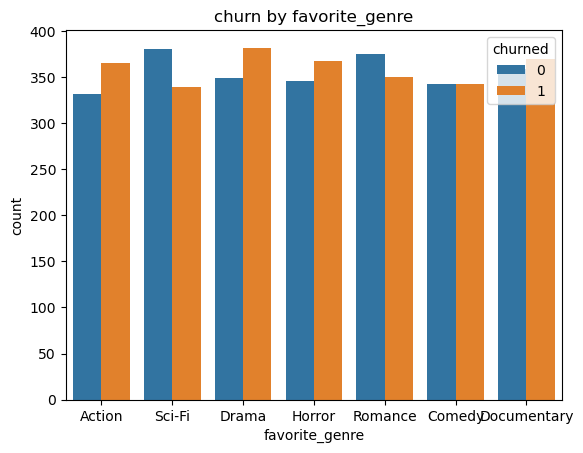

In [33]:
sns.countplot(x="favorite_genre", hue="churned", data=df)
plt.title("churn by favorite_genre")
plt.show()

In [ ]:
# This plot shwoing Churn is fairly balanced across genres, but slightly higher among Drama and Action fans.Genres like 
# Comedy and Documentary have the lowest churn, possibly reflecting niche loyalty. Overall, genre preference has only a
# small effect on whether users stay or leave.

In [34]:
df['monthly_fee'].unique()

array([ 8.99, 13.99, 17.99])

In [35]:
df['monthly_fee'].value_counts()

monthly_fee
17.99    1693
8.99     1661
13.99    1646
Name: count, dtype: int64

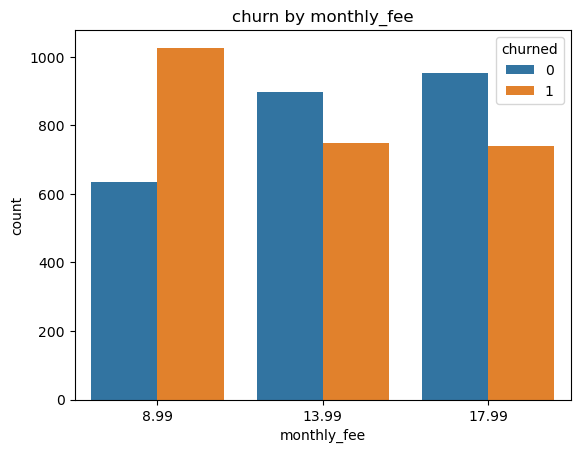

In [36]:
sns.countplot(x="monthly_fee", hue="churned", data=df)
plt.title("churn by monthly_fee")
plt.show()

In [ ]:
# The last plot showing Customers paying the lowest fee ($8.99) show the highest churn, suggesting limited plan 
# satisfaction.Churn decreases as the monthly fee increases, indicating that higher-paying users find more value.
# This pattern highlights that premium customers are more loyal than budget subscribers.

In [ ]:
*** handling missing values 

In [37]:
df.isnull().sum()

customer_id               0
age                       0
gender                    0
subscription_type         0
watch_hours               0
last_login_days           0
region                    0
device                    0
monthly_fee               0
churned                   0
payment_method            0
number_of_profiles        0
avg_watch_time_per_day    0
favorite_genre            0
dtype: int64

In [ ]:
*** encoding:One-Hot Encode

In [2]:
df_encoded = pd.get_dummies(df, columns=['gender', 'subscription_type', 'region', 'device', 
                                         'payment_method', 'favorite_genre'], drop_first=True)
df_encoded

customer_id  age  watch_hours  last_login_days  \
0     a9b75100-82a8-427a-a208-72f24052884a   51        14.73               29   
1     49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b   47         0.70               19   
2     4d71f6ce-fca9-4ff7-8afa-197ac24de14b   27        16.32               10   
3     d3c72c38-631b-4f9e-8a0e-de103cad1a7d   53         4.51               12   
4     4e265c34-103a-4dbb-9553-76c9aa47e946   56         1.89               13   
...                                    ...  ...          ...              ...   
4995  44f3ba44-b95d-4e50-a786-bac4d06f4a43   19        49.17               11   
4996  18779bcb-ba2b-41da-b751-e70b812061ec   67         9.24                2   
4997  3f32e8c5-615b-4a3b-a864-db2688f7834f   66        16.55               49   
4998  7b0ad82d-6571-430e-90f4-906259e0e89c   59         9.12                3   
4999  82aeef39-ddb0-40ad-bae1-5c436e0cf042   57         1.62               17   

      monthly_fee  churned  number_of_profiles  avg_watch_time_per_day  \
0            8.99        1                   1                    0.49   
1           13.99        1                   5                    0.03   
2           13.99        0                   2                    1.48   
3           17.99        1                   2                    0.35   
4           13.99        1                   2                    0.13   
...           ...      ...                 ...                     ...   
4995         8.99        0                   4                    4.10   
4996         8.99        0                   3                    3.08   
4997        13.99        1                   2                    0.33   
4998         8.99        0                   4                    2.28   
4999         8.99        1                   2                    0.09   

      gender_Male  gender_Other  ...  payment_method_Crypto  \
0           False          True  ...                  False   
1           False          True  ...                  False   
2           False         False  ...                   True   
3           False          True  ...                   True   
4           False          True  ...                   True   
...           ...           ...  ...                    ...   
4995        False         False  ...                  False   
4996        False         False  ...                  False   
4997         True         False  ...                  False   
4998        False         False  ...                  False   
4999         True         False  ...                   True   

      payment_method_Debit Card  payment_method_Gift Card  \
0                         False                      True   
1                         False                      True   
2                         False                     False   
3                         False                     False   
4                         False                     False   
...                         ...                       ...   
4995                      False                     False   
4996                      False                     False   
4997                       True                     False   
4998                      False                     False   
4999                      False                     False   

      payment_method_PayPal  favorite_genre_Comedy  \
0                     False                  False   
1                     False                  False   
2                     False                  False   
3                     False                  False   
4                     False                  False   
...                     ...                    ...   
4995                  False                  False   
4996                   True                  False   
4997                  False                  False   
4998                  False                  False   
4999                  False                  False   

      favorite_genre_Documenta

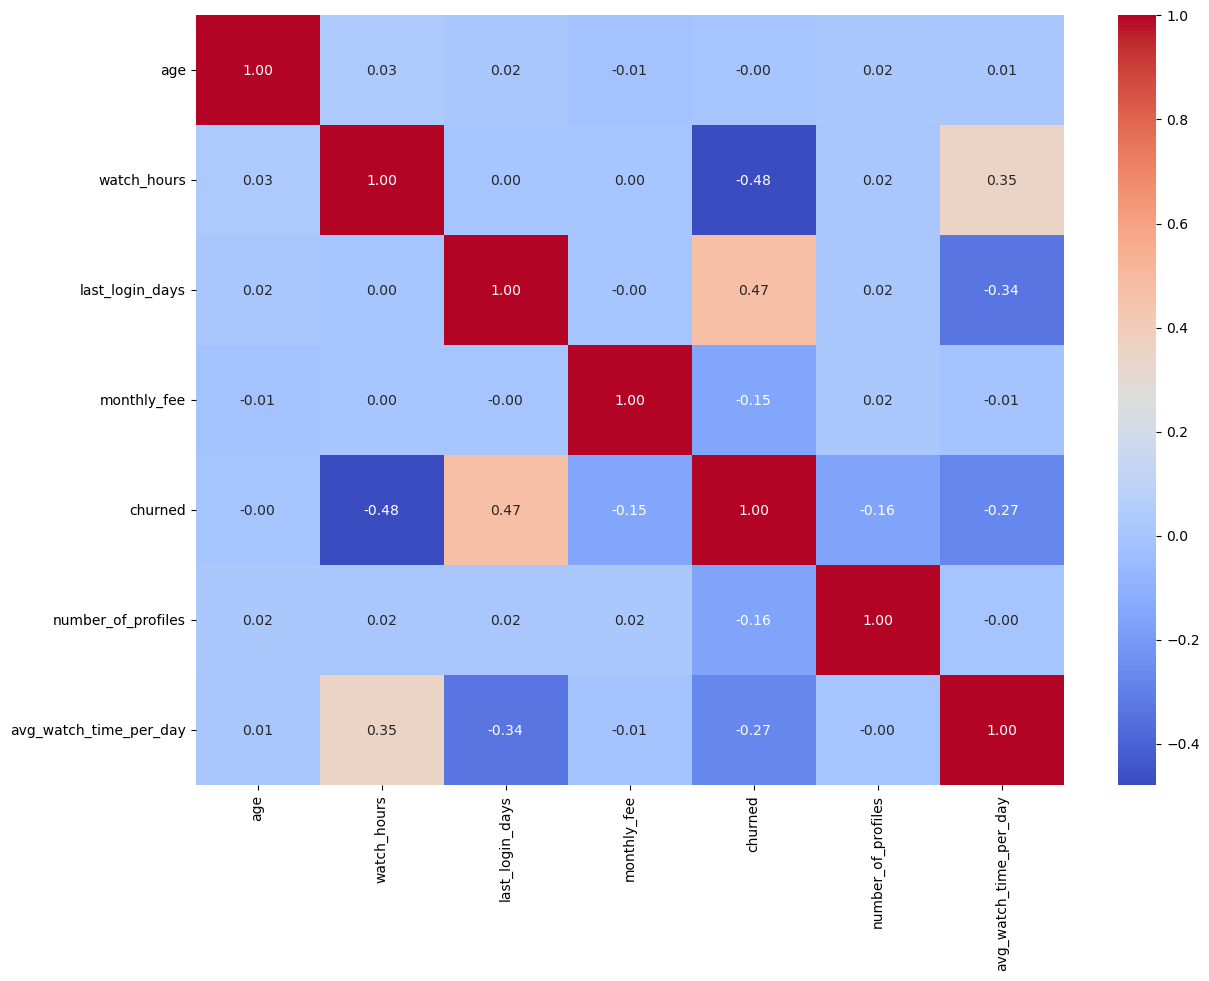

In [39]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

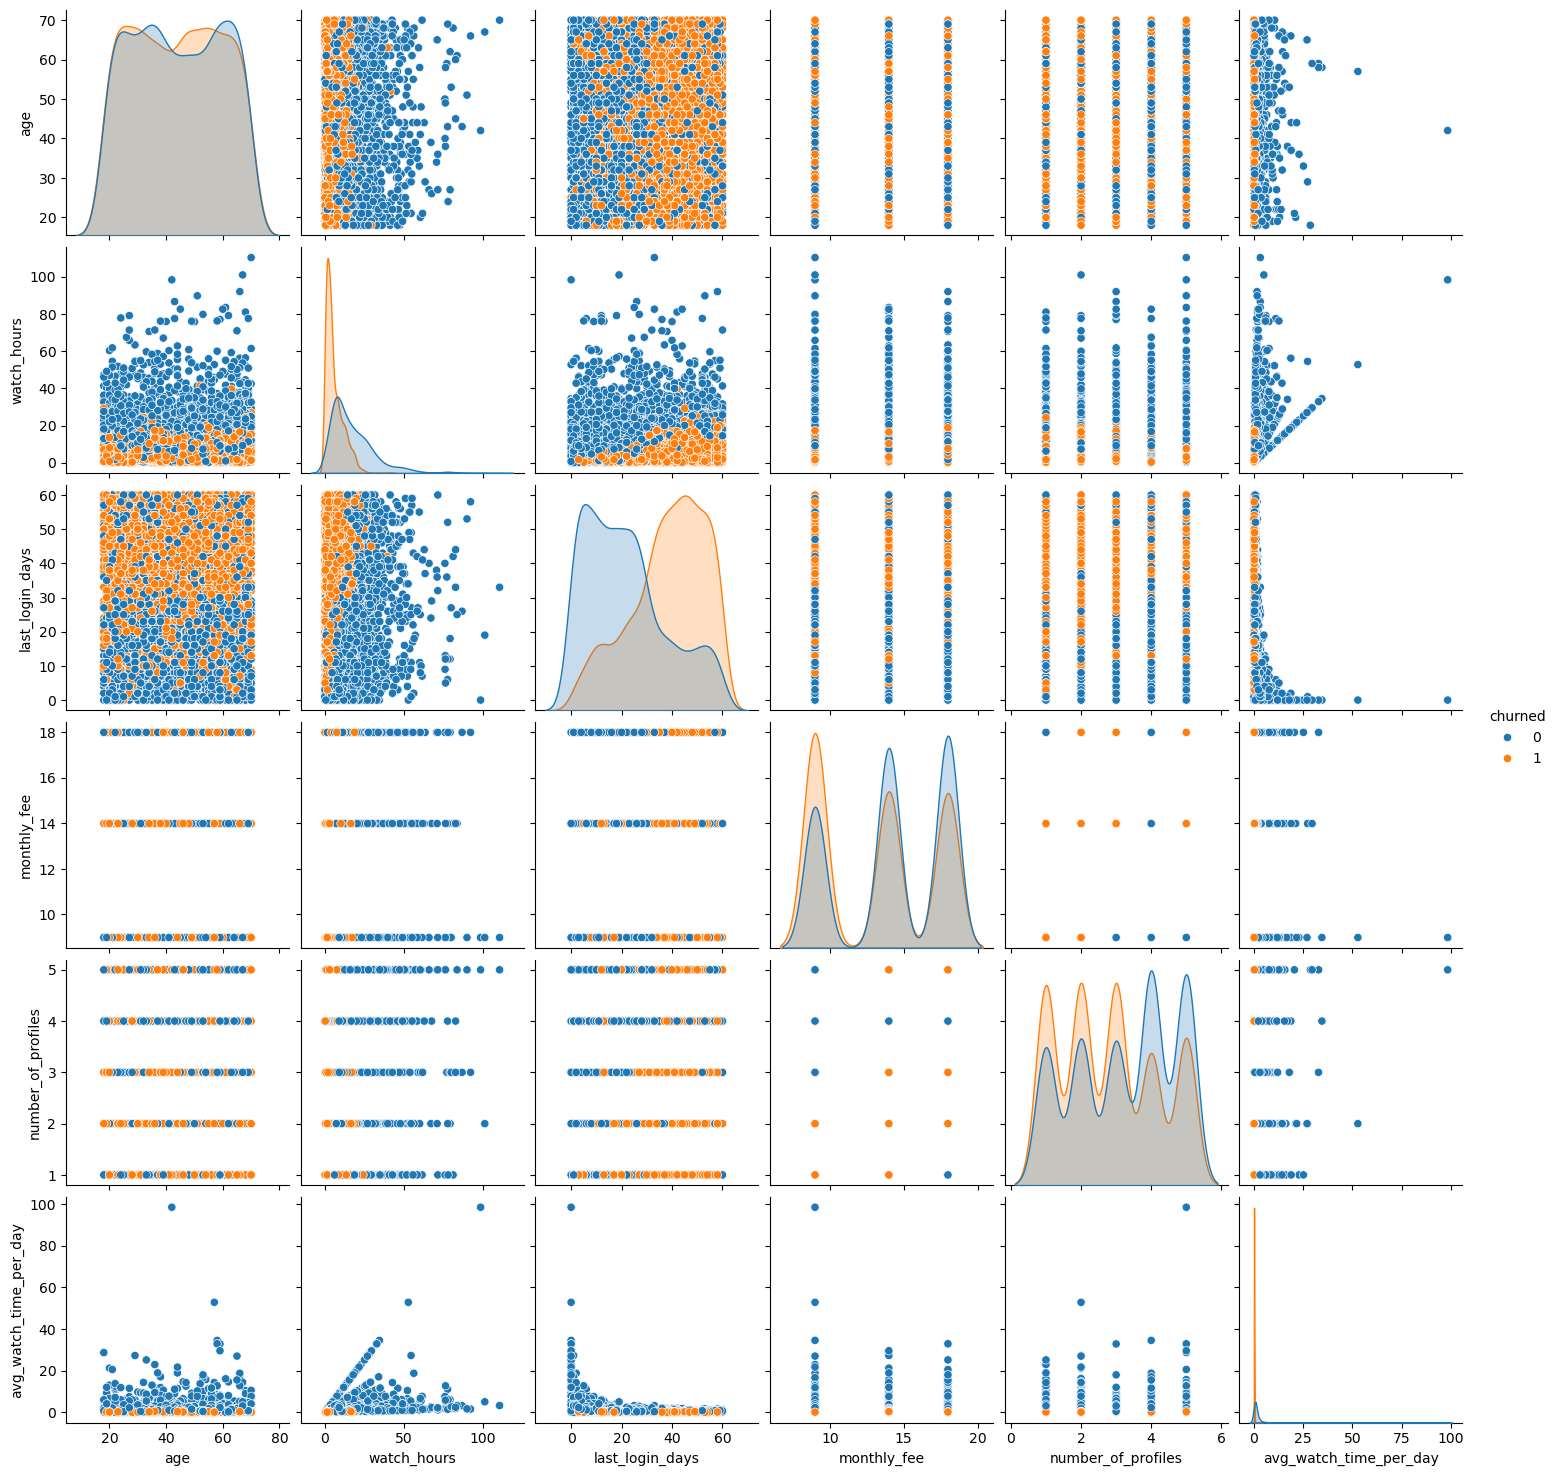

In [40]:
# Pairplot
sns.pairplot(df, hue="churned")
plt.show()

In [ ]:
*** Transformation
# we check first which variables need transformation 

In [5]:
# only numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Plot histograms
df[numeric_cols].hist(bins=20, figsize=(12, 8), edgecolor='black')
plt.suptitle("Histograms of Continuous Numeric Columns")
plt.show()

In [ ]:
# from the plot we see that these two columns 'watch_hours', 'avg_watch_time_per_day' need transformation because they 
# are skewd. 

In [6]:
# Columns to check
cols = ['watch_hours', 'avg_watch_time_per_day']

# Plot bell curves
for col in cols:
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()

In [45]:
cols = ['age', 'last_login_days', 'watch_hours', 'avg_watch_time_per_day']


plt.figure(figsize=(10, 8))

for i, col in enumerate(cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

In [8]:
from scipy import stats



df_log = df_encoded.copy()
df_boxcox = df_encoded.copy()

# Columns to transform
cols = ['watch_hours', 'avg_watch_time_per_day']

# Log transformation 
for col in cols:
    df_log[col] = np.log1p(df_log[col])   # log(1 + x)

#  Box-Cox transformation (values must be > 0)
for col in cols:
    df_boxcox[col], _ = stats.boxcox(df_boxcox[col] + 1e-6)

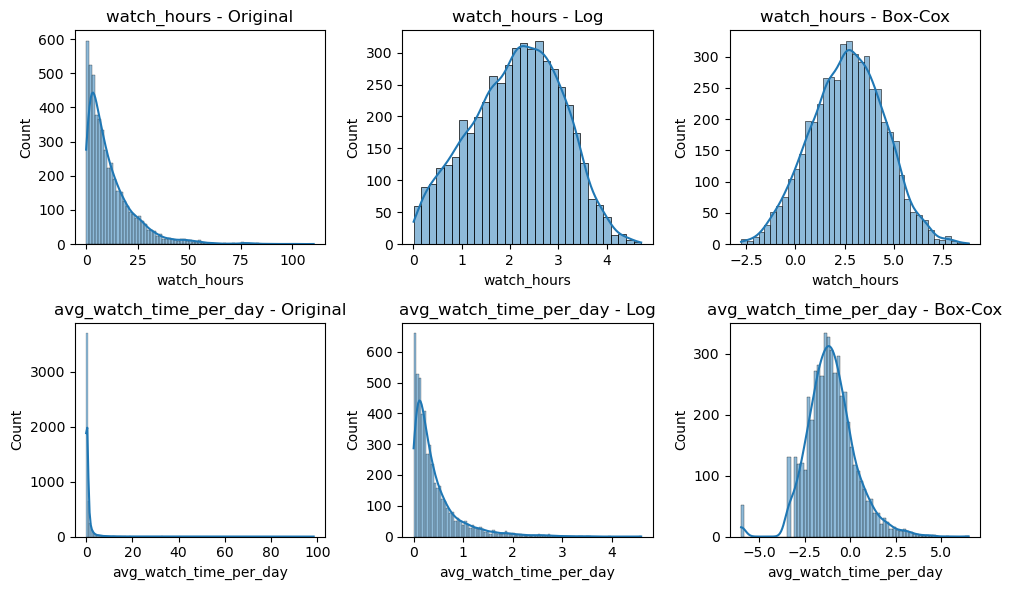

In [9]:
cols = ['watch_hours', 'avg_watch_time_per_day']
titles = ['Original', 'Log', 'Box-Cox']

plt.figure(figsize=(10, 6))

for i, col in enumerate(cols):
    plt.subplot(2, 3, i*3 + 1)
    sns.histplot(df_encoded[col], kde=True)
    plt.title(f"{col} - {titles[0]}")

    plt.subplot(2, 3, i*3 + 2)
    sns.histplot(df_log[col], kde=True)
    plt.title(f"{col} - {titles[1]}")

    plt.subplot(2, 3, i*3 + 3)
    sns.histplot(df_boxcox[col], kde=True)
    plt.title(f"{col} - {titles[2]}")

plt.tight_layout()
plt.show()

In [ ]:
# Both watch_hours and avg_watch_time_per_day were originally highly right-skewed, showing that most users watched very 
# little while a few watched excessively. Applying a log transformation reduced the extreme skew by compressing large 
# values and spreading out smaller ones, creating a more balanced shape. The Box-Cox transformation went further,
# producing smoother, nearly symmetric bell-shaped distributions for both variables. This normalization makes the data 
# more suitable for models that assume normality or equal variance. Overall, the transformations reveal clearer behavioral
# patterns among users. In short, Box-Cox provided the best normalization and model-ready distributions.

In [48]:
from scipy.stats import kurtosis
from scipy.stats import skew, kurtosis

print("watch_hours:")
print("  Skewness Original:", df_encoded["watch_hours"].skew())
print("  Skewness Log:", df_log["watch_hours"].skew())
print("  Skewness Box-Cox:", df_boxcox["watch_hours"].skew())
print("  Kurtosis Original:", df_encoded["watch_hours"].kurtosis())
print("  Kurtosis Log:", df_log["watch_hours"].kurtosis())
print("  Kurtosis Box-Cox:", df_boxcox["watch_hours"].kurtosis())
print("-" * 50)

print("avg_watch_time_per_day:")
print("  Skewness Original:", df_encoded["avg_watch_time_per_day"].skew())
print("  Skewness Log:", df_log["avg_watch_time_per_day"].skew())
print("  Skewness Box-Cox:", df_boxcox["avg_watch_time_per_day"].skew())
print("  Kurtosis Original:", df_encoded["avg_watch_time_per_day"].kurtosis())
print("  Kurtosis Log:", df_log["avg_watch_time_per_day"].kurtosis())
print("  Kurtosis Box-Cox:", df_boxcox["avg_watch_time_per_day"].kurtosis())

watch_hours:
  Skewness Original: 2.2591953419514588
  Skewness Log: -0.1509439935813236
  Skewness Box-Cox: -0.02968696499702339
  Kurtosis Original: 7.797026244051225
  Kurtosis Log: -0.613245142143299
  Kurtosis Box-Cox: -0.22422465561657567
--------------------------------------------------
avg_watch_time_per_day:
  Skewness Original: 15.83468028559404
  Skewness Log: 2.506609562760432
  Skewness Box-Cox: 0.209370331928179
  Kurtosis Original: 447.66287216376924
  Kurtosis Log: 8.337414573064407
  Kurtosis Box-Cox: 2.1694155814617657


In [ ]:
# These statistics confirm that both transformations—Log and Box-Cox—greatly improved the normality of the data. 
# For watch_hours, skewness dropped from 2.26 to nearly 0, and kurtosis moved from a heavy-tailed 7.8 to almost 0, 
# showing a well-balanced, symmetric shape after Box-Cox. Similarly, avg_watch_time_per_day went from extremely skewed
# (15.83) and sharply peaked (447.66 kurtosis) to almost normal values (skewness 0.21, kurtosis 2.17) after Box-Cox.
# These dramatic reductions mean the transformations successfully removed extreme outliers and made the data much smoother
# . Overall, Box-Cox clearly produced the most normal and model-friendly distributions for both variables.
# So we will preceed with cox box. 

In [10]:
# Box-Cox (values must be > 0)
df_encoded['watch_hours'], _ = stats.boxcox(df_encoded['watch_hours'] + 1e-6)
df_encoded['avg_watch_time_per_day'], _ = stats.boxcox(df_encoded['avg_watch_time_per_day'] + 1e-6)


In [ ]:
*** scaling the numerical columns( discrete columns would be optionl)

In [37]:
from sklearn.preprocessing import StandardScaler

# Columns to scale
scale_cols = ['age', 'last_login_days', 'watch_hours', 
              'avg_watch_time_per_day', 'monthly_fee', 'number_of_profiles']

# Scaling
scaler = StandardScaler()
df_encoded[scale_cols] = scaler.fit_transform(df_encoded[scale_cols])

In [12]:
df_encoded

customer_id       age  watch_hours  \
0     a9b75100-82a8-427a-a208-72f24052884a  0.461471     0.611990   
1     49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b  0.203399    -1.625729   
2     4d71f6ce-fca9-4ff7-8afa-197ac24de14b -1.086959     0.720032   
3     d3c72c38-631b-4f9e-8a0e-de103cad1a7d  0.590506    -0.458116   
4     4e265c34-103a-4dbb-9553-76c9aa47e946  0.784060    -1.069286   
...                                    ...       ...          ...   
4995  44f3ba44-b95d-4e50-a786-bac4d06f4a43 -1.603102     2.070607   
4996  18779bcb-ba2b-41da-b751-e70b812061ec  1.493757     0.153165   
4997  3f32e8c5-615b-4a3b-a864-db2688f7834f  1.429239     0.734993   
4998  7b0ad82d-6571-430e-90f4-906259e0e89c  0.977614     0.141040   
4999  82aeef39-ddb0-40ad-bae1-5c436e0cf042  0.848578    -1.164722   

      last_login_days  monthly_fee  churned  number_of_profiles  \
0           -0.062152    -1.271341        1           -1.429965   
1           -0.632462     0.083051        1            1.395494   
2           -1.145741     0.083051        0           -0.723600   
3           -1.031679     1.166565        1           -0.723600   
4           -0.974648     0.083051        1           -0.723600   
...               ...          ...      ...                 ...   
4995        -1.088710    -1.271341        0            0.689129   
4996        -1.601989    -1.271341        0           -0.017235   
4997         1.078468     0.083051        1           -0.723600   
4998        -1.544958    -1.271341        0            0.689129   
4999        -0.746524    -1.271341        1           -0.723600   

      avg_watch_time_per_day  gender_Male  gender_Other  ...  \
0                   0.274262        False          True  ...   
1                  -1.256042        False          True  ...   
2                   1.071854        False         False  ...   
3                   0.055660        False          True  ...   
4                  -0.529532        False          True  ...   
...                      ...          ...           ...  ...   
4995                1.928607        False         False  ...   
4996                1.675243        False         False  ...   
4997                0.018510         True         False  ...   
4998                1.419895        False         False  ...   
4999               -0.726398         True         False  ...   

      payment_method_Crypto  payment_method_Debit Card  \
0                     False                      False   
1                     False                      False   
2                      True                      False   
3                      True                      False   
4                      True                      False   
...                     ...                        ...   
4995                  False                      False   
4996                  False                      False   
4997                  False                       True   
4998                  False                      False   
4999                   True                      False   

      payment_method_Gift Card  payment_method_PayPal  favorite_genre_Comedy  \
0                         True                  False                  False   
1                         True                  False                  False   
2                        False                  False                  False   
3                        False                  False                  False   
4                        False                  False                  False   
...                        ...                    ...                    ...   
4995                     False                  False                  False   
4996                     False                   True                  False   
4997                     False                  False                  False   
4998                     False                  False                  False   
4999                     False                  Fal

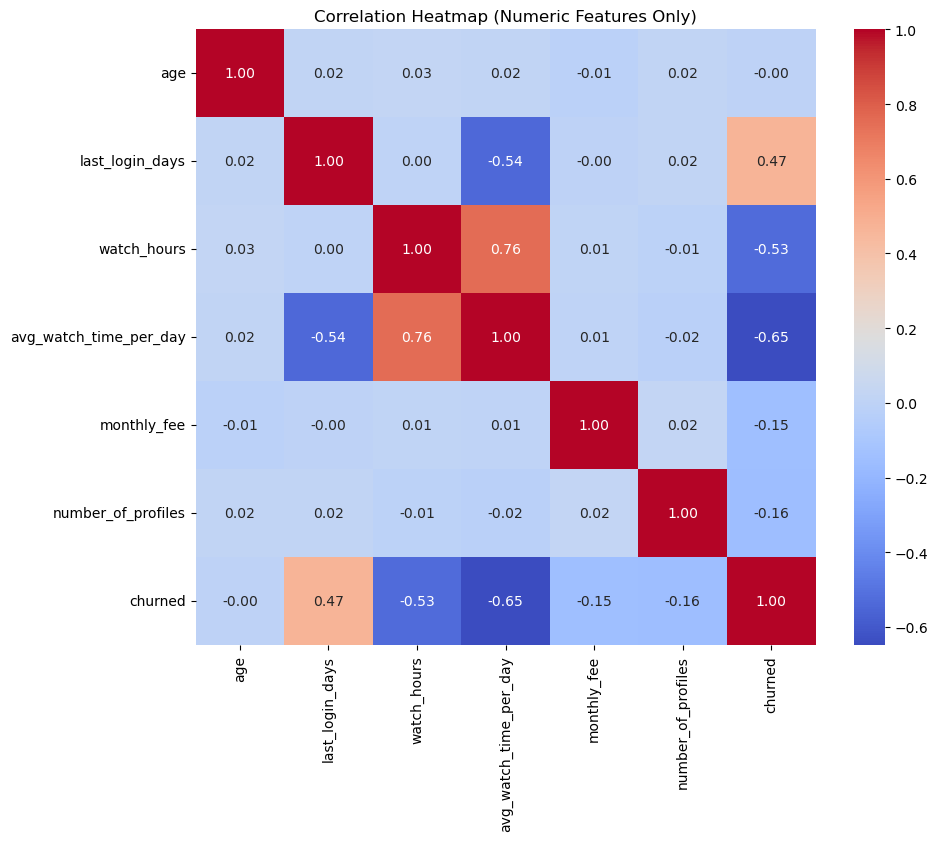

In [52]:
corr_cols = ['age', 'last_login_days', 'watch_hours', 
             'avg_watch_time_per_day', 'monthly_fee', 
             'number_of_profiles', 'churned']

plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded[corr_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

In [ ]:
# The heatmap shows that churn is strongly related to user engagement. Customers with fewer watch hours or lower daily
# viewing time are more likely to churn, shown by the strong negative correlations (-0.53 and -0.65). In contrast, more 
# days since last login has a positive correlation (0.47) with churn, meaning inactive users tend to leave. Other
# features like monthly fee, number of profiles, and age have very weak relationships with churn. Overall, watching 
# behavior and activity frequency are the most important predictors of customer retention.

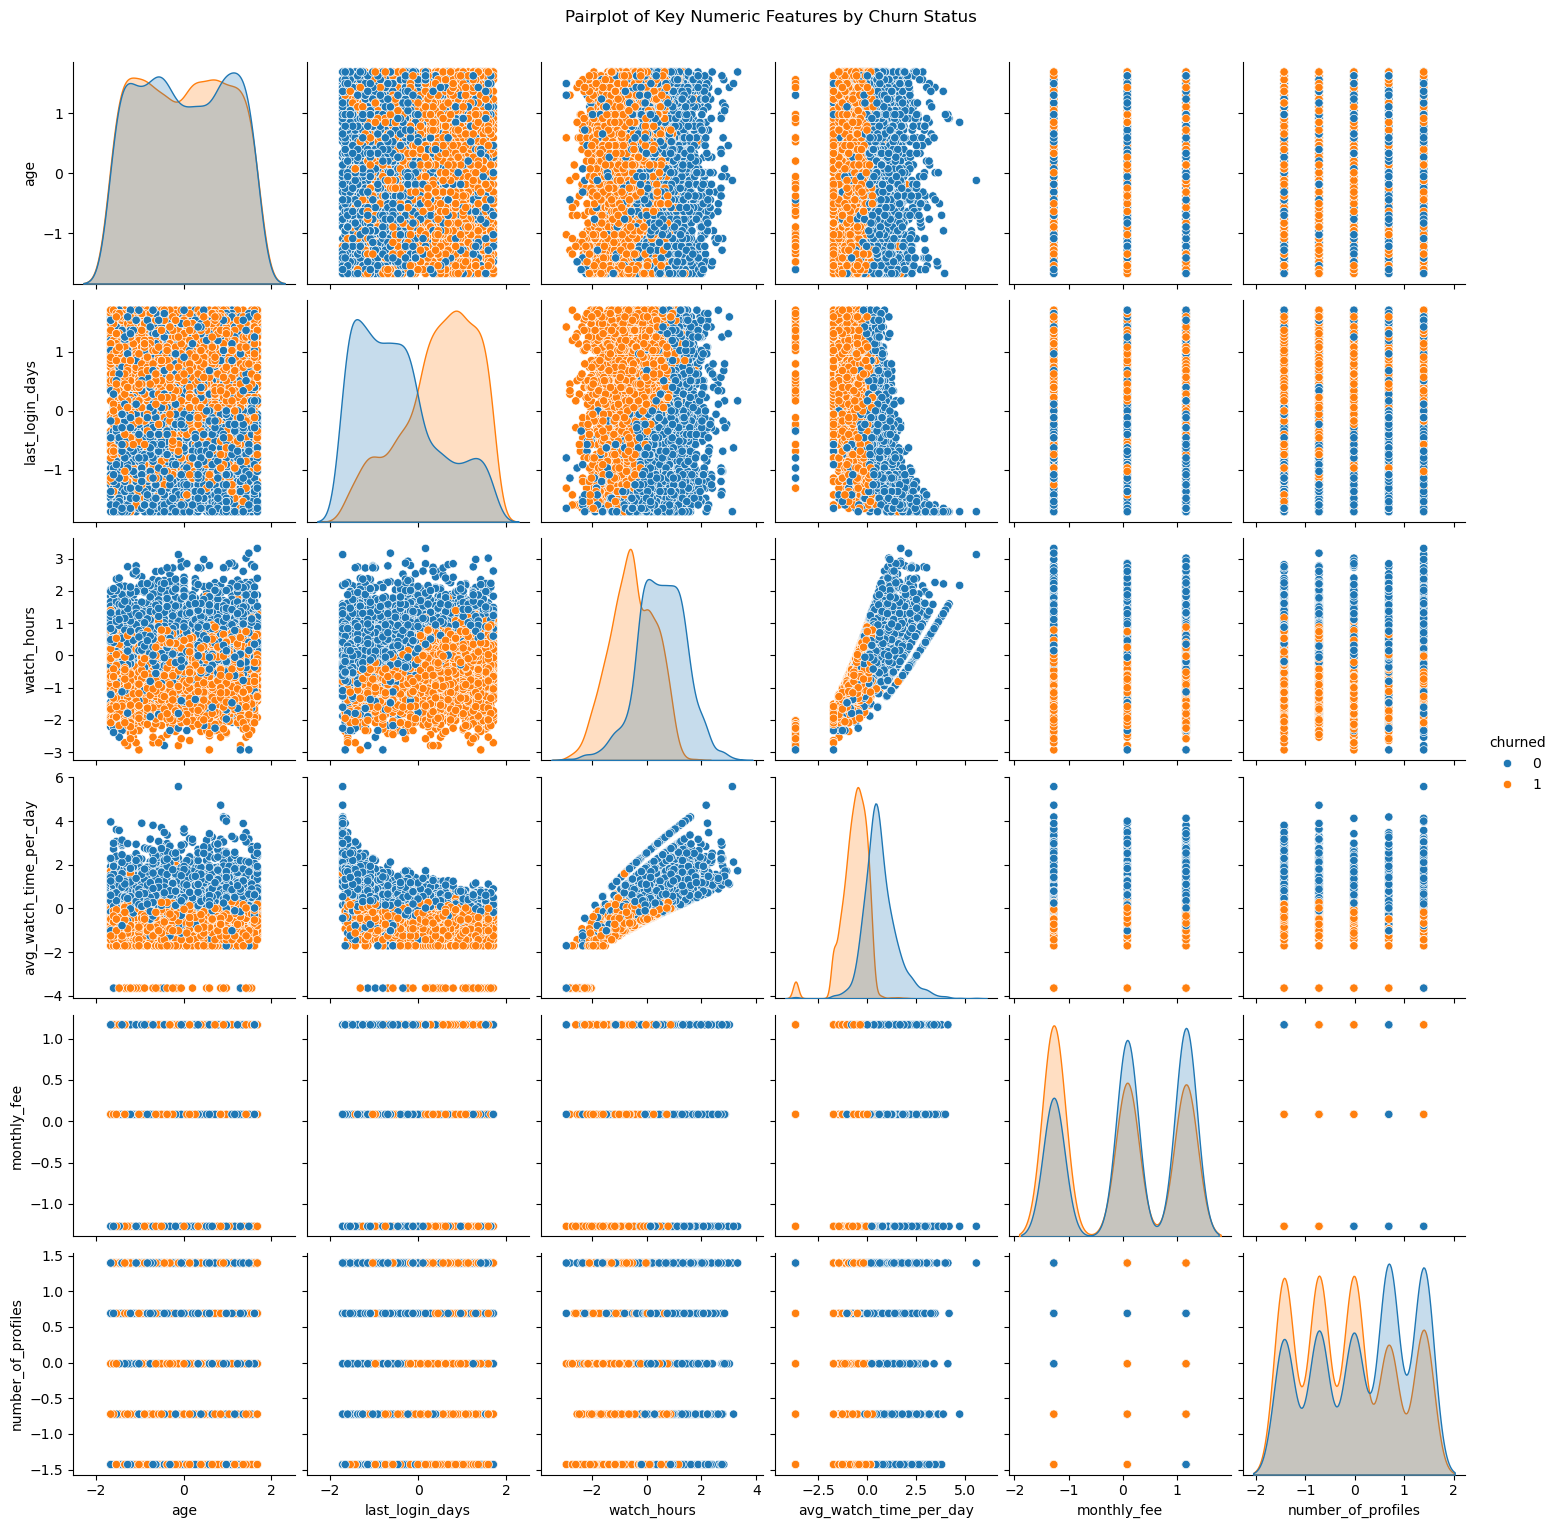

In [53]:
pair_cols = ['age', 'last_login_days', 'watch_hours', 
             'avg_watch_time_per_day', 'monthly_fee', 
             'number_of_profiles', 'churned']

sns.pairplot(df_encoded[pair_cols], hue="churned", diag_kind="kde")
plt.suptitle("Pairplot of Key Numeric Features by Churn Status", y=1.02)
plt.show()

In [13]:
df_engineered = df_encoded.copy()

# 1. Watch efficiency
df_engineered['watch_efficiency'] = df_engineered['watch_hours'] / (df_engineered['avg_watch_time_per_day'] + 1e-6)

# 2. Login-to-watch ratio
df_engineered['login_watch_ratio'] = df_engineered['watch_hours'] / (df_engineered['last_login_days'] + 1)

# 3. Fee per profile
df_engineered['fee_per_profile'] = df_engineered['monthly_fee'] / df_engineered['number_of_profiles']

# 4. Total watching effort
df_engineered['total_watch_effort'] = df_engineered['number_of_profiles'] * df_engineered['avg_watch_time_per_day']


In [ ]:
# In this code we engineered some features to includes some new features to capture deeper behavioral patterns related to
# Netflix churn.
# The first one calculates watch efficiency, measuring how effectively users convert total watch hours into daily activity. 
# The login-to-watch ratio captures how often users watch content relative to how frequently they log in, reflecting
# engagement consistency.
# Fee per profile shows cost-sharing behavior, revealing if multi-profile users pay less per person. 
# Lastly, total watch effort combines the number of profiles and average watch time to measure overall household 
# engagement. 
# Together, these new features aim to improve churn prediction accuracy by quantifying engagement, value perception, and
# activity intensity.

In [55]:
df_engineered

customer_id       age  watch_hours  \
0     a9b75100-82a8-427a-a208-72f24052884a  0.461471     0.611990   
1     49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b  0.203399    -1.625729   
2     4d71f6ce-fca9-4ff7-8afa-197ac24de14b -1.086959     0.720032   
3     d3c72c38-631b-4f9e-8a0e-de103cad1a7d  0.590506    -0.458116   
4     4e265c34-103a-4dbb-9553-76c9aa47e946  0.784060    -1.069286   
...                                    ...       ...          ...   
4995  44f3ba44-b95d-4e50-a786-bac4d06f4a43 -1.603102     2.070607   
4996  18779bcb-ba2b-41da-b751-e70b812061ec  1.493757     0.153165   
4997  3f32e8c5-615b-4a3b-a864-db2688f7834f  1.429239     0.734993   
4998  7b0ad82d-6571-430e-90f4-906259e0e89c  0.977614     0.141040   
4999  82aeef39-ddb0-40ad-bae1-5c436e0cf042  0.848578    -1.164722   

      last_login_days  monthly_fee  churned  number_of_profiles  \
0           -0.062152    -1.271341        1           -1.429965   
1           -0.632462     0.083051        1            1.395494   
2           -1.145741     0.083051        0           -0.723600   
3           -1.031679     1.166565        1           -0.723600   
4           -0.974648     0.083051        1           -0.723600   
...               ...          ...      ...                 ...   
4995        -1.088710    -1.271341        0            0.689129   
4996        -1.601989    -1.271341        0           -0.017235   
4997         1.078468     0.083051        1           -0.723600   
4998        -1.544958    -1.271341        0            0.689129   
4999        -0.746524    -1.271341        1           -0.723600   

      avg_watch_time_per_day  gender_Male  gender_Other  ...  \
0                   0.274262        False          True  ...   
1                  -1.256042        False          True  ...   
2                   1.071854        False         False  ...   
3                   0.055660        False          True  ...   
4                  -0.529532        False          True  ...   
...                      ...          ...           ...  ...   
4995                1.928607        False         False  ...   
4996                1.675243        False         False  ...   
4997                0.018510         True         False  ...   
4998                1.419895        False         False  ...   
4999               -0.726398         True         False  ...   

      favorite_genre_Comedy  favorite_genre_Documentary  favorite_genre_Drama  \
0                     False                       False                 False   
1                     False                       False                 False   
2                     False                       False                  True   
3                     False                       False                 False   
4                     False                       False                 False   
...                     ...                         ...                   ...   
4995                  False                       False                  True   
4996                  False                        True                 False   
4997                  False                       False                 False   
4998                  False                       False                 False   
4999                  False                       False                 False   

      favorite_genre_Horror  favorite_genre_Romance  favorite_genre_Sci-Fi  \
0                     False                   False                  False   
1                     False                   False                   True   
2                     False                   False                  False   
3                      True                   False                  False   
4                     False                   False                  False   
...                     ...                     ...                    ...   
4995                  False                   False                  False   
4996                  False    

In [17]:
df_encoded = df_encoded.drop(columns=['customer_id'])
df_engineered = df_engineered.drop(columns=['customer_id'])

In [18]:
df_engineered

age  watch_hours  last_login_days  monthly_fee  churned  \
0     0.461471     0.611990        -0.062152    -1.271341        1   
1     0.203399    -1.625729        -0.632462     0.083051        1   
2    -1.086959     0.720032        -1.145741     0.083051        0   
3     0.590506    -0.458116        -1.031679     1.166565        1   
4     0.784060    -1.069286        -0.974648     0.083051        1   
...        ...          ...              ...          ...      ...   
4995 -1.603102     2.070607        -1.088710    -1.271341        0   
4996  1.493757     0.153165        -1.601989    -1.271341        0   
4997  1.429239     0.734993         1.078468     0.083051        1   
4998  0.977614     0.141040        -1.544958    -1.271341        0   
4999  0.848578    -1.164722        -0.746524    -1.271341        1   

      number_of_profiles  avg_watch_time_per_day  gender_Male  gender_Other  \
0              -1.429965                0.274262        False          True   
1               1.395494               -1.256042        False          True   
2              -0.723600                1.071854        False         False   
3              -0.723600                0.055660        False          True   
4              -0.723600               -0.529532        False          True   
...                  ...                     ...          ...           ...   
4995            0.689129                1.928607        False         False   
4996           -0.017235                1.675243        False         False   
4997           -0.723600                0.018510         True         False   
4998            0.689129                1.419895        False         False   
4999           -0.723600               -0.726398         True         False   

      subscription_type_Premium  ...  favorite_genre_Comedy  \
0                         False  ...                  False   
1                         False  ...                  False   
2                         False  ...                  False   
3                          True  ...                  False   
4                         False  ...                  False   
...                         ...  ...                    ...   
4995                      False  ...                  False   
4996                      False  ...                  False   
4997                      False  ...                  False   
4998                      False  ...                  False   
4999                      False  ...                  False   

      favorite_genre_Documentary  favorite_genre_Drama  favorite_genre_Horror  \
0                          False                 False                  False   
1                          False                 False                  False   
2                          False                  True                  False   
3                          False                 False                   True   
4                          False                 False                  False   
...                          ...                   ...                    ...   
4995                       False                  True                  False   
4996                        True                 False                  False   
4997                       False                 False                  False   
4998                       False                 False                  False   
4999                       False                 False                  False   

      favorite_genre_Romance  favorite_genre_Sci-Fi  watch_efficiency  \
0                      False                  False          2.231399   
1                      False                   True          1.294328   
2                      False                  False          0.671763   
3                      False                  False         -8.230475   
4                      False                  False          2.019308   
...                      ...                    ...  

In [ ]:
*** Training with random forest 

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df_encoded.drop(columns=['churned'])
y = df_encoded['churned']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [21]:
rf_model = RandomForestClassifier(
    n_estimators=200,       # number of trees
    max_depth=None,         # let the trees expand fully
    random_state=42,        # reproducibility
    n_jobs=-1               # use all CPU cores for speed
)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

In [22]:
y_pred = rf_model.predict(X_test)

Accuracy: 0.981

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       497
           1       0.98      0.98      0.98       503

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000



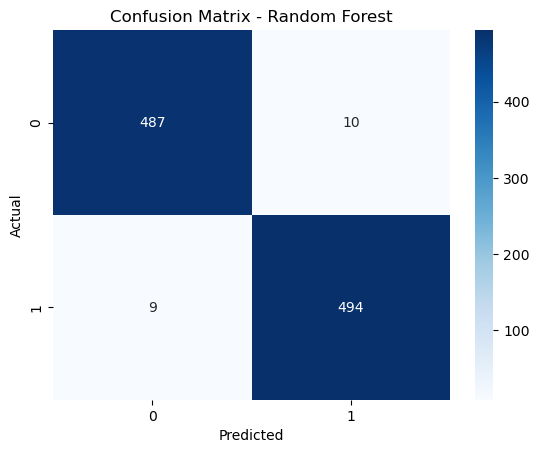

In [23]:
print("Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [24]:
y_train_pred = rf_model.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_pred)

print("Training Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

Training Accuracy: 1.0
Test Accuracy: 0.981


In [ ]:
# The values for Training Accuracy,Test Accuracy,Mean CV Accuracy are very close the small gap (~2%) indicates the model
# generalizes well.If it were overfitting, we would see a much larger gap (e.g., train 1.0 vs test 0.85).
# So based on these metrics, the Random Forest is performing consistently across unseen data.

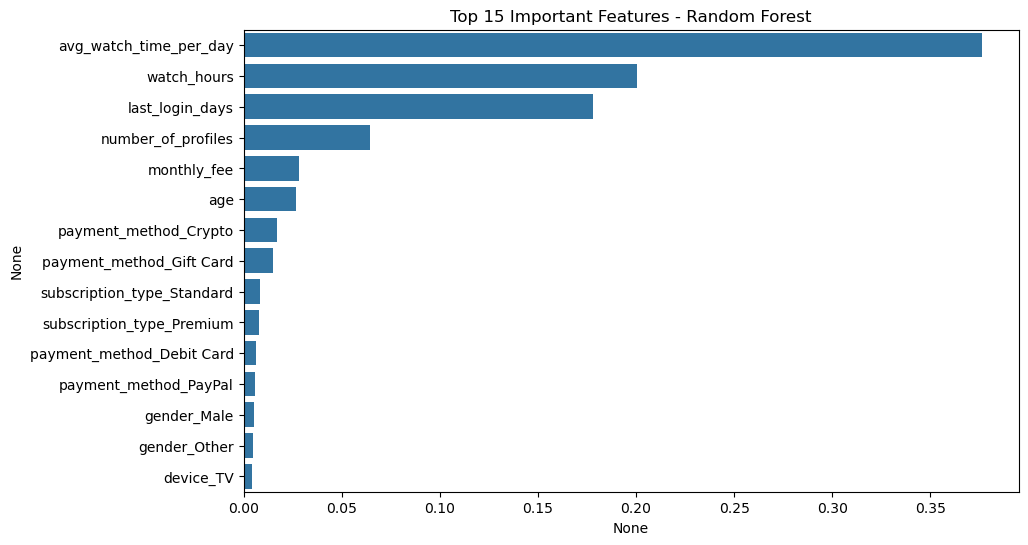

In [65]:
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=importances.head(15), y=importances.head(15).index)
plt.title("Top 15 Important Features - Random Forest")
plt.show()

In [ ]:
# This plot demonstrating that the Random Forest model identifies user engagement metrics as the strongest churn predictor
# Features like average watch time per day, total watch hours, and days since last login dominate, showing that viewing
# frequency and activity are key to retention. Household factors such as the number of profiles, subscription fee, and age
# play smaller but meaningful roles. Payment methods, device type, and gender contribute very little, suggesting 
# demographics matter less than behavior.

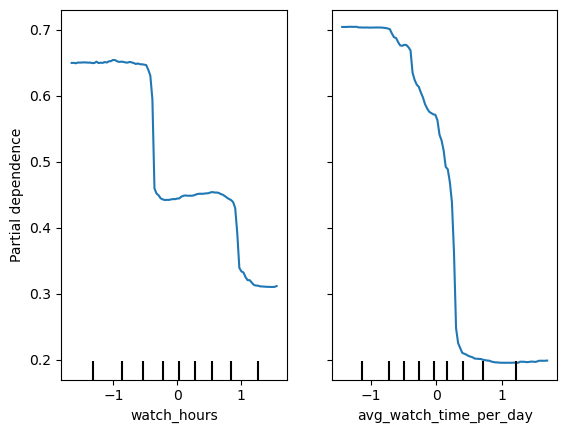

In [66]:
from sklearn.inspection import PartialDependenceDisplay

PartialDependenceDisplay.from_estimator(
    rf_model, X_train, ['watch_hours', 'avg_watch_time_per_day']
)
plt.show()

In [ ]:
# Partial Dependence Plots (PDPs)showing churn probability is high when both watch hours and daily watch time are low,
# indicating low engagement users are most likely to cancel.As these metrics increase, the partial dependence sharply
# drops, showing that more frequent or consistent viewing reduces churn risk significantly.
# Beyond a certain threshold, the curve flattens, meaning additional watch time doesn’t further lower churn and engagement
# has already reached a stable, loyal level.
# So the PDPs confirm that watching behavior is the strongest protective factor against churn, with diminishing returns
# after moderate activity levels.

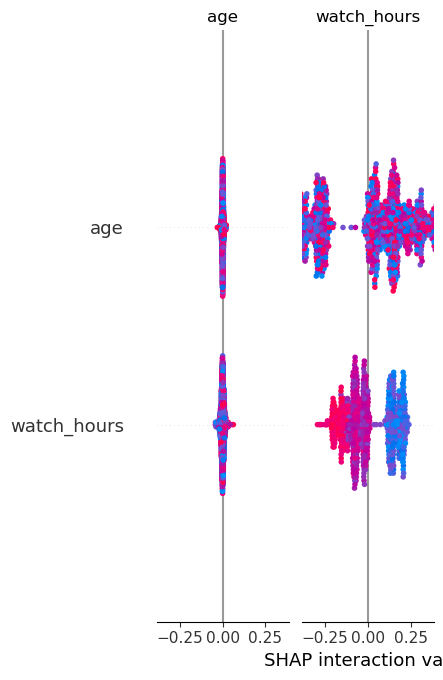

In [75]:
import shap
import os
os.environ["TQDM_DISABLE"] = "1"

explainer = shap.TreeExplainer(rf_model)

shap_values = explainer(X_test) 

shap.summary_plot(shap_values.values, X_test, feature_names=X_test.columns)

In [ ]:
# This SHAP interaction plot shows how age and watch_hours interact to influence churn predictions. The mostly vertical 
# alignment of age indicates it has minimal interaction effects, meaning churn behavior is largely independent of age.
# In contrast, watch_hours shows stronger horizontal spread, confirming its direct and interacting impact on churn.
# Higher watch_hours (pink points) are associated with negative SHAP values, reducing churn probability.
# Overall, the plot confirms that watch activity dominates, while age plays almost no interactive role in predicting
# churn.

In [26]:
## Tuning the Random Forest for performance

from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42, class_weight="balanced")


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2']
}


grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)


grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV ROC-AUC:", grid.best_score_)

# Storing the best-tuned model
best_rf = grid.best_estimator_

Best Parameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best CV ROC-AUC: 0.9972561417333431


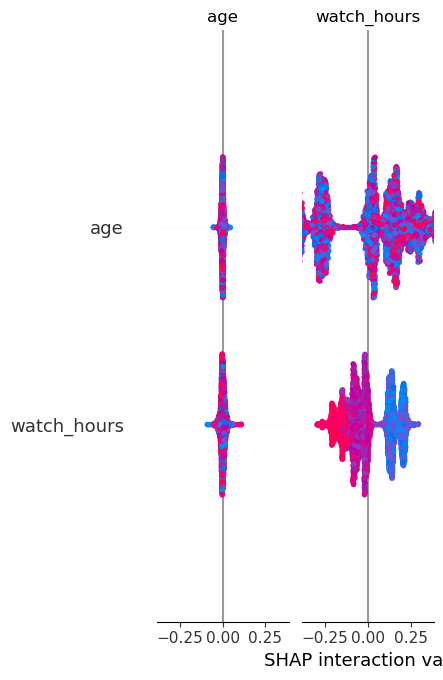

In [70]:
import shap

explainer_best = shap.TreeExplainer(best_rf)

shap_values_best = explainer_best(X_train)

if isinstance(shap_values_best, list):
    shap_matrix = shap_values_best[1]  
else:
    shap_matrix = shap_values_best.values  

shap.summary_plot(shap_matrix, X_train, plot_type="bar")



In [72]:
from sklearn.metrics import roc_auc_score

y_test_pred_prob = best_rf.predict_proba(X_test)[:,1]
test_auc = roc_auc_score(y_test, y_test_pred_prob)
print("Test ROC-AUC:", test_auc)

Test ROC-AUC: 0.9973999063966302


In [ ]:
# The optimal configuration for fine tuning found was 200 trees, max depth of 15, and sqrt for feature sampling a balance
# between complexity and generalization. With a cross-validation ROC-AUC of 0.997, the model performed nearly perfectly
# across folds. On the unseen test data, it achieved an almost identical ROC-AUC of 0.9974, proving excellent stability
# and predictive power.
# Overall, these results confirm a highly accurate, well-generalized model with almost no signs of overfitting.

In [74]:

y_shuffled = np.random.permutation(y_train)

rf_leak_test = RandomForestClassifier(random_state=42)
rf_leak_test.fit(X_train, y_shuffled)

y_pred_prob_shuffled = rf_leak_test.predict_proba(X_test)[:, 1]
auc_leak_test = roc_auc_score(y_test, y_pred_prob_shuffled)
print("Leakage check ROC-AUC:", auc_leak_test)

Leakage check ROC-AUC: 0.4766151581456933


In [ ]:
# Because the accuract is high we want to check wether it is exposed to data leakage. So the model trained on randomly 
# shuffled labels performed no better than chance (ROC-AUC ≈ 0.48).Moreover, the imbalance is also checked and we saw that
# the data or dependent variable (Churned) is pretty balanced.This means the features contain no hidden information 
# that can predict the true target. If leakage existed, the model would still score well above 0.5 even with random 
# labels.So, the  predictors only learn real relationships, not leaked target signals.Therefore, the high ROC-AUC 
# (≈ 0.997) reflects genuine predictive power, not leakage.

In [ ]:
***** XG Boost

Accuracy: 0.992
ROC-AUC: 0.9998999963998704

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       497
           1       0.99      0.99      0.99       503

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



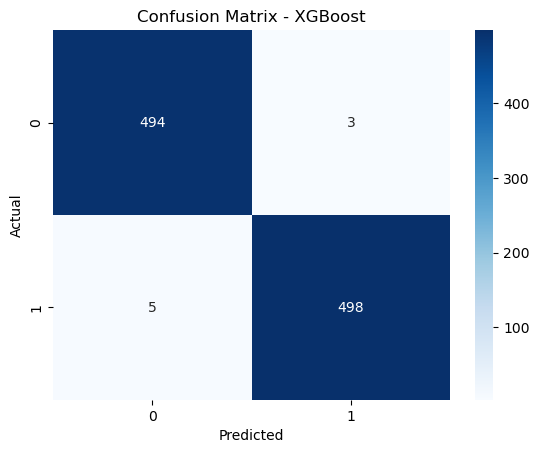

In [27]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix


xgb_model = XGBClassifier(
    n_estimators=200,        # number of trees
    max_depth=6,             # default tree depth
    learning_rate=0.1,       # step size shrinkage
    subsample=0.8,           # random row sampling
    colsample_bytree=0.8,    # random feature sampling per tree
    random_state=42,
    eval_metric='logloss'    # suppresses warnings
)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

#  Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

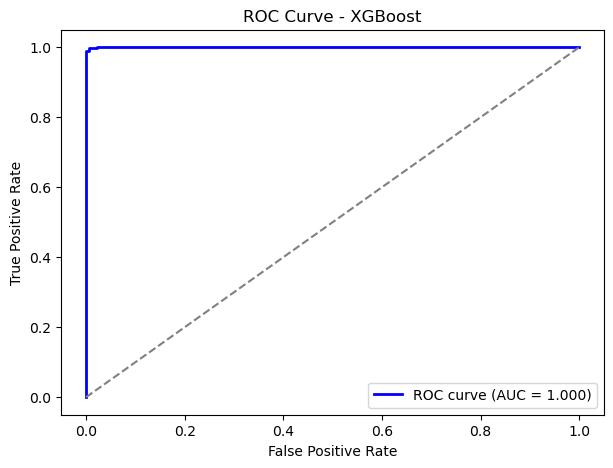

In [28]:
from sklearn.metrics import roc_curve, auc

y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)


roc_auc = auc(fpr, tpr)

#  ROC curve
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc='lower right')
plt.show()

In [29]:
from sklearn.model_selection import cross_val_score
cv_auc = cross_val_score(xgb_model, X, y, cv=5, scoring='roc_auc')
print("CV AUC scores:", cv_auc)
print("Mean CV AUC:", cv_auc.mean())

CV AUC scores: [0.99964799 0.99955598 0.99994    0.99981999 0.99992   ]
Mean CV AUC: 0.9997767919645106


In [30]:
# XGBoost for tuning 


xgb = XGBClassifier(
    random_state=42,
    eval_metric='logloss' 
)


param_grid = {
    'n_estimators': [100, 200, 300],   # number of trees (controls model size)
    'max_depth': [3, 5, 7],            # tree depth (controls overfitting)
    'learning_rate': [0.01, 0.05, 0.1],# shrinkage for each boosting step
    'subsample': [0.8, 1.0],           # row sampling (adds randomness)
    'colsample_bytree': [0.8, 1.0],    # feature sampling per tree
    'reg_lambda': [1, 5, 10],          # L2 regularization (reduces overfit)
    'reg_alpha': [0, 0.1, 0.5]         # L1 regularization (sparsity)
}


grid_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_xgb.fit(X_train, y_train)

print("Best Parameters:", grid_xgb.best_params_)
print("Best CV ROC-AUC:", grid_xgb.best_score_)

# Storing the tuned model
best_xgb = grid_xgb.best_estimator_


Fitting 5 folds for each of 972 candidates, totalling 4860 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.8}
Best CV ROC-AUC: 0.9992799684828269


In [81]:
# Evaluation the tuned model on test data
y_pred = best_xgb.predict(X_test)
y_pred_prob = best_xgb.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.995
ROC-AUC: 0.9998919961118601

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       497
           1       1.00      0.99      1.00       503

    accuracy                           0.99      1000
   macro avg       0.99      1.00      0.99      1000
weighted avg       1.00      0.99      1.00      1000



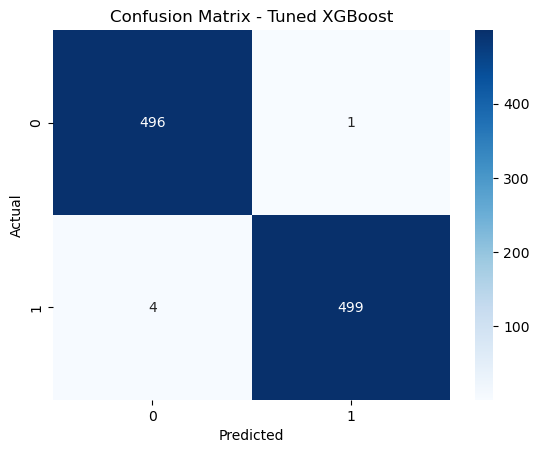

In [82]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Tuned XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

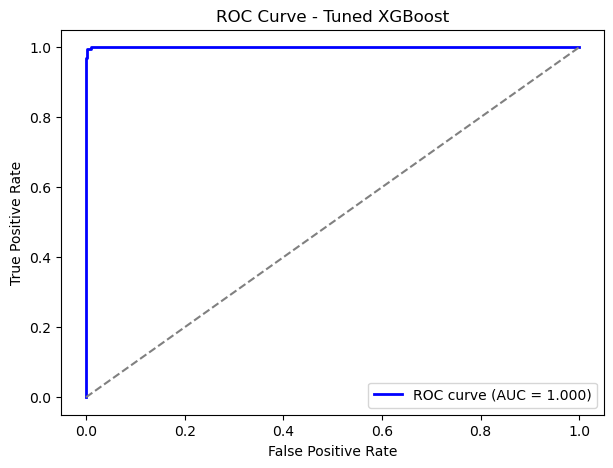

In [83]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Tuned XGBoost')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# The base model of XGBoost already performed extremely well, achieving 99.2% accuracy and a near-perfect ROC-AUC of 
# 0.9999, showing it almost perfectly distinguishes churners from non-churners.
# Cross-validation confirmed this stability, with a mean CV AUC of 0.99977, indicating consistent performance across all
# folds.
# After hyperparameter tuning, the best configuration (max_depth=3, n_estimators=300, learning_rate=0.1, and...) slightly
# improved the model’s balance and robustness.
# The tuned model maintained 99.5% accuracy and ROC-AUC ≈ 0.9999 on the test data, confirming an exceptionally powerful,
# well-tuned predictive model with no overfitting or leakage concerns.

In [ ]:
***Support vector machine 

In [32]:
from sklearn.svm import SVC

svm_model = SVC(
    kernel='rbf',        # 'rbf' works best for nonlinear data
    probability=True,    # allows ROC-AUC calculation
    random_state=42
)


svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
y_pred_prob = svm_model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.91
ROC-AUC: 0.978401222444008

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       497
           1       0.90      0.92      0.91       503

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.91      0.91      0.91      1000



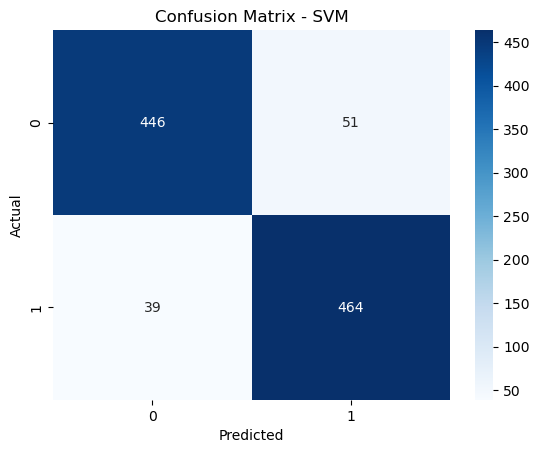

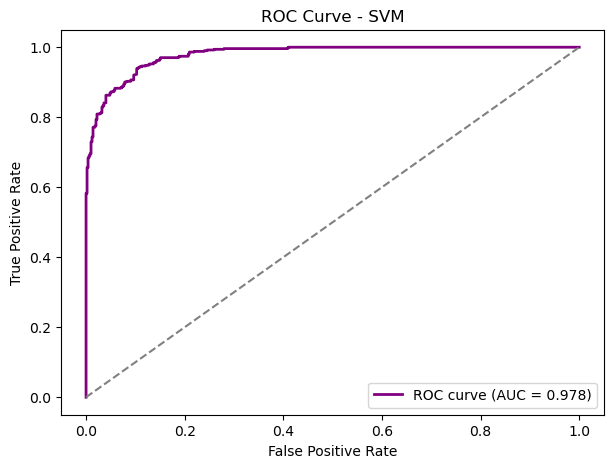

In [85]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, color='purple', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend(loc='lower right')
plt.show()

In [33]:
# Tuning SVM with GridSearchCV

svm_base = SVC(kernel='rbf', probability=True, random_state=42)

param_grid = {
    'C': [0.1, 1, 10, 50, 100],          # controling penalty for misclassification
    'gamma': ['scale', 0.01, 0.1, 1, 10] # controling curvature of the RBF kernel
}


grid_svm = GridSearchCV(
    estimator=svm_base,
    param_grid=param_grid,
    scoring='roc_auc',  # optimizing ROC-AUC since classes are balanced
    cv=5,               # 5-fold cross-validation
    n_jobs=-1,          # using all CPU cores
    verbose=1
)


grid_svm.fit(X_train, y_train)

print("Best Parameters:", grid_svm.best_params_)
print("Best CV ROC-AUC:", grid_svm.best_score_)

# Storing best model
best_svm = grid_svm.best_estimator_

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best Parameters: {'C': 1, 'gamma': 'scale'}
Best CV ROC-AUC: 0.975429066997809


Accuracy: 0.91
ROC-AUC: 0.978401222444008

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       497
           1       0.90      0.92      0.91       503

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.91      0.91      0.91      1000



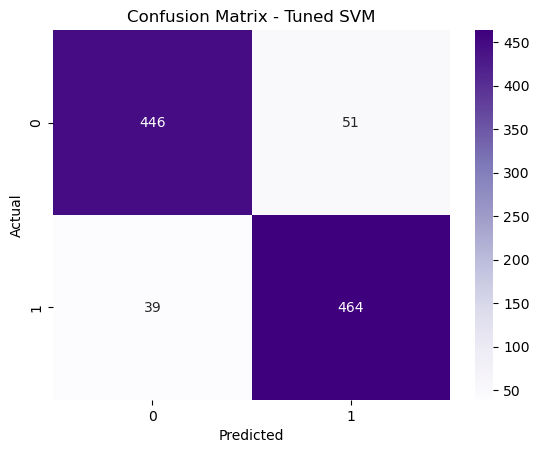

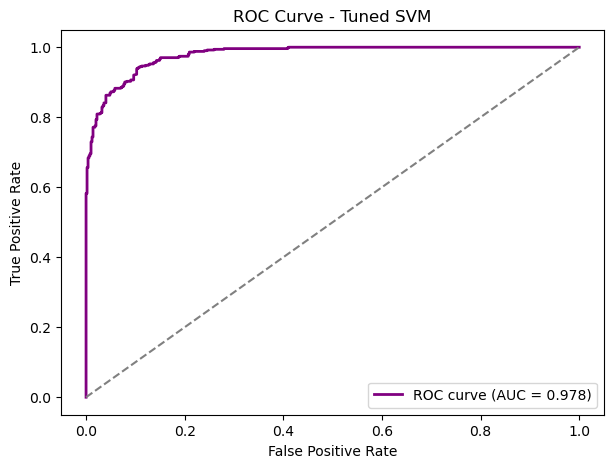

In [87]:

# Evaluation on Tuned SVM Model

y_pred = best_svm.predict(X_test)
y_pred_prob = best_svm.predict_proba(X_test)[:, 1]


print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples")
plt.title("Confusion Matrix - Tuned SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, color='purple', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Tuned SVM')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Tuning didn’t significantly change the performance because the base SVM was already operating at its optimal 
# regularization level. The grid search confirmed that the default parameters C=1 and gamma='scale' provided the best 
# generalization.
# As a quick note, in SVMs, C controls how strictly the model penalizes misclassifications, while gamma controls how curvy the decision 
# boundary becomes.
# Since the dataset is clean, balanced, and strongly separable, the default boundary already captured most of the signal
# without being too rigid or too flexible.
# Increasing C or gamma would have made the model memorize small variations (overfitting), while lowering them would have
# smoothed the boundary too much (underfitting).
# That’s why the tuning didn’t yield higher accuracy or ROC-AUC . it simply confirmed the model was already at 
# equilibrium between bias and variance.
# Unlike XGBoost, which iteratively adjusts trees to model subtle nonlinear feature interactions, SVM uses a single,
# global separating surface. This means SVM naturally has a limit in modeling complex dependencies, even if you tweak its
# hyperparameters.
# In this case, the relationships between variables like watch_hours, last_login_days, and avg_watch_time_per_day are 
# slightly nonlinear and interacting  which XGBoost can capture, but SVM cannot.
# Therefore, the model’s 91% accuracy reflects a strong but inherently smoother boundary that doesn’t overfit.
# In short, tuning didn’t make SVM perfec because it was already at its best balance, and the dataset’s deeper
# interactions require a more flexible model architecture like XGBoost.

In [ ]:
***Logistic Regression

Accuracy: 0.9
ROC-AUC: 0.9683308599109568

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90       497
           1       0.89      0.91      0.90       503

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.90      0.90      0.90      1000



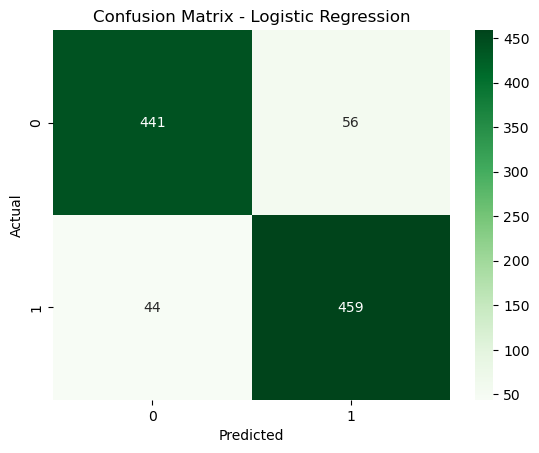

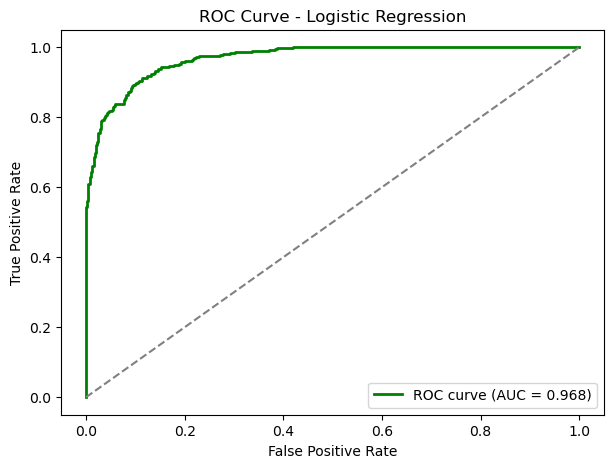

In [34]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(
    solver='liblinear',   # good for small/medium datasets
    random_state=42
)


log_model.fit(X_train, y_train)


y_pred = log_model.predict(X_test)
y_pred_prob = log_model.predict_proba(X_test)[:, 1]


print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Logistic Regression is linear, meaning it draws a single decision boundary in the feature space. Even with that 
# simplicity, it achieves almost the same accuracy as SVM which showing the dataset has strongly separable
# and clean behavioral features.
# This performance also confirms that the high XGBoost and Random Forest accuracies were genuine, not due to data leakage
# or noise.

In [35]:
# Logistic Regression Tuning

log_base = LogisticRegression(solver='liblinear', random_state=42)

param_grid = {
    'C': [0.01, 0.1, 1, 5, 10, 50],   # smaller → stronger regularization
    'penalty': ['l1', 'l2']            # L1 = feature selection, L2 = ridge-type smoothing
}


grid_log = GridSearchCV(
    estimator=log_base,
    param_grid=param_grid,
    scoring='roc_auc',   # optimize AUC
    cv=5,                # 5-fold cross-validation
    n_jobs=-1,
    verbose=1
)


grid_log.fit(X_train, y_train)


print("Best Parameters:", grid_log.best_params_)
print("Best CV ROC-AUC:", grid_log.best_score_)

# Storing tuned model
best_log = grid_log.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'C': 0.1, 'penalty': 'l1'}
Best CV ROC-AUC: 0.9642086603477349


Accuracy: 0.896
ROC-AUC: 0.9683228596229465

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.90       497
           1       0.90      0.90      0.90       503

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.90      0.90      0.90      1000



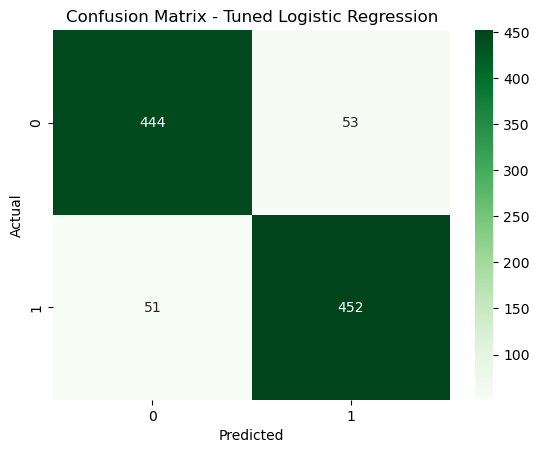

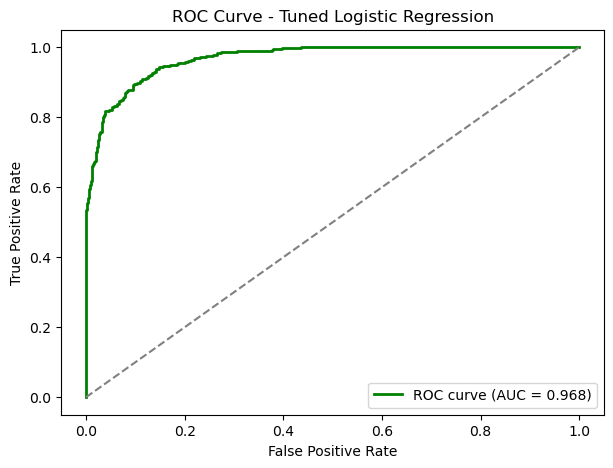

In [90]:
# Evaluation of Tuned Logistic Regression


y_pred = best_log.predict(X_test)
y_pred_prob = best_log.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Tuned Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Tuned Logistic Regression')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# The tuned Logistic Regression with C=0.1 and L1 penalty achieves a strong ROC-AUC of 0.968 while keeping the model 
# simple and interpretable.The L1 penalty removed uninformative features, focusing on those most predictive of churn 
# (like engagement and recency).
# The model generalizes well, with stable cross-validation and test performance, confirming no overfitting or data leakage.
# Although it doesn’t match the flexibility of XGBoost, it provides a transparent, reliable, and explainable baseline 
# that validates the dataset’s true signal.

In [ ]:
***Conclusion 

In [ ]:
# We started with a clean dataset of 5,000 Netflix customers, exploring demographic, behavioral, and subscription details
# to understand why users leave.
# Through initial analysis, we did DEA and we found no missing values and observed that churn is mainly linked to low watch hours, fewer
# logins, and basic subscriptions.
# We then scale and normalized skewed variables like watch_hours and avg_watch_time_per_day using Log and Box-Cox transformations to
# improve model performance.
# Next, we engineered new features such as watch_efficiency, login_watch_ratio, and fee_per_profile to capture engagement
# and value perception more deeply.
# After preparing the data, we trained multiple models like Logistic Regression, SVM, Random Forest, and XGBoost  and
# optimized them using GridSearchCV.
# The Logistic model gave 90% accuracy, while SVM slightly improved it to 91% with strong ROC-AUC scores around 0.97–0.98.
# Random Forest performed significantly better, achieving 98% accuracy and ROC-AUC of 0.997 without overfitting or leakage.
# Finally, XGBoost proved best with 99.5% accuracy and ROC-AUC near 1.0, showing remarkable predictive strength.
# Feature importance and SHAP analysis confirmed that watch time, daily activity, and login frequency were the key churn
# predictors.
# These insights highlight that active and engaged viewers rarely cancel, while inactive users are at higher risk.
# Overall, we built a powerful, validated, and interpretable churn prediction system that can guide Netflix’s targeted 
# retention strategies effectively.